<h2>Exploratory Data Analysis</h2>

<h3>Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

/anaconda/envs/workstation_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3>Reading Data</h3>

In [2]:
# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="###",
    resource_group_name="###",
    workspace_name="###",
)

In [3]:
import pandas as pd
version = "Cleaned_Data"
# get a handle of the data asset and print the URI
data_asset = ml_client.data.get(name="Car-Data", version=version)
print(f"Data asset URI: {data_asset.path}")

# read into pandas - note that you will see 2 headers in your data frame - that is ok, for now

df = pd.read_csv(data_asset.path)

Data asset URI: azureml://subscriptions/144c7089-5d3d-40fa-bfaf-6ffb69774b59/resourcegroups/AML-sdk-v2-RG1/workspaces/AML-sdk-v2-RG1-WS1/datastores/workspaceblobstore/paths/LocalUpload/38a8ca735227b6f486f243a31bb53bea/Cleaned_Data.csv


In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.columns

Index(['Fuel_Type', 'Power(kw)', 'Max_Torque(nm)', 'Cylinders',
       'Valves_Per_Cylinder', 'Engine_Capacity(cc)', 'Max_Power_Rpm',
       'Max_Torque_Rpm', 'Fuel_System', 'Turbo', 'Co2_Emissions(g/km)',
       'Compression_Ratio'],
      dtype='object')

<h3>Univariate Analysis & Outlier Detection</h3>

<pre>Outlier Detection</pre>

<pre>
Often a dataset will have a few points that are extreme outliers. It's better to remove these few points
from the dataset to have a more generalized model. We will use Inter Quartile Range method to detect outliers. 
Also if a large percentage of your data is labelled as outliers then you just have an wide distribution, 
not Outliers.
</pre>

<pre>Let's check every single feature one by one..</pre>

<pre>
Fuel_Type:

Let's check the distribution of different fuel types.
Plotting a count plot to visualize the distribution.
</pre>

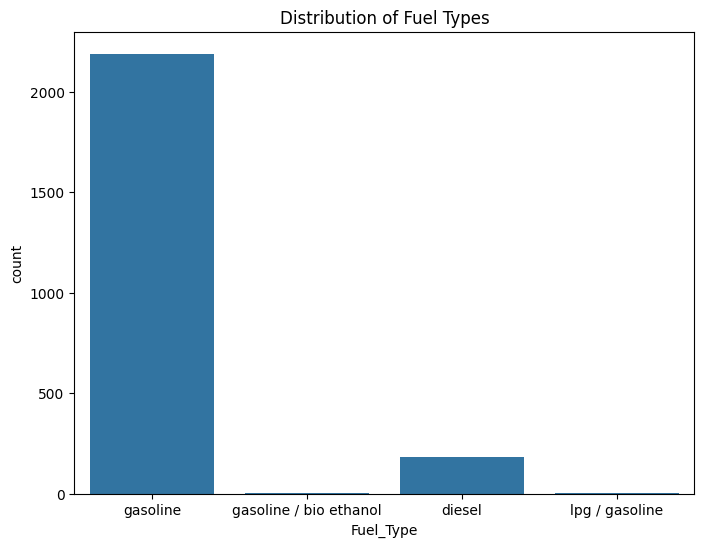

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribution of Fuel Types')
plt.show()

<pre>
Compression_Ratio:

Let's explore the distribution of compression ratios.
Let's use a histogram to visualize the spread of compression ratios.
</pre>

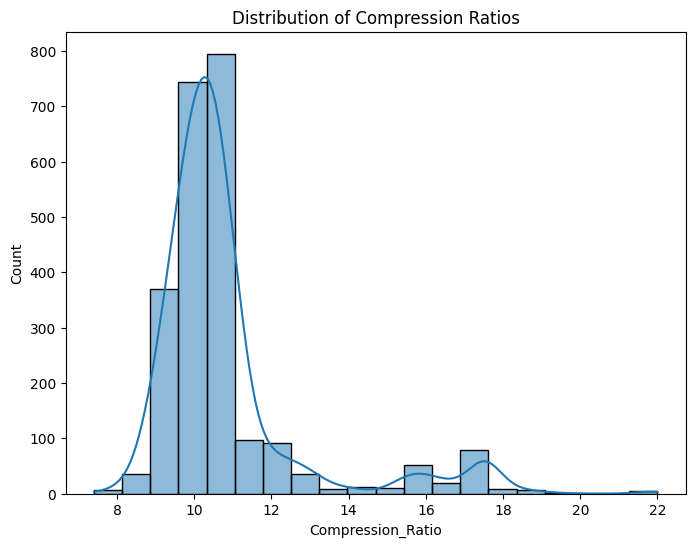

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Compression_Ratio'], bins=20, kde=True)
plt.title('Distribution of Compression Ratios')
plt.show()

<pre>Outlier Detection based on IQR</pre>

In [8]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [9]:
Compression_ratio_outliers = detect_outliers(df["Compression_Ratio"])
Compression_ratio_outliers = df[Compression_ratio_outliers].shape[0]
Compression_ratio_outliers

243

<pre>Out of 2378 instances in our dataframe it is not possible to have 243 outliers.</pre>

<pre>
Power(kW):

Let's examine the distribution of power values.
Let's use a histogram to visualize the spread.
</pre>

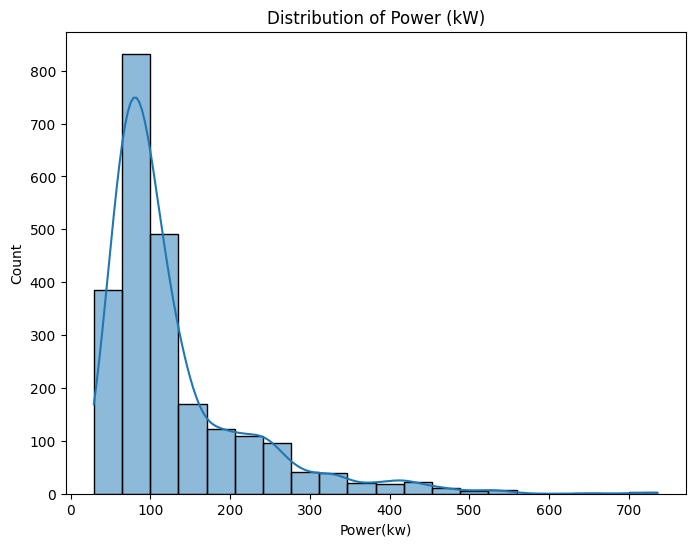

In [10]:
# 3. Power(kW)
plt.figure(figsize=(8, 6))
sns.histplot(df['Power(kw)'], bins=20, kde=True)
plt.title('Distribution of Power (kW)')
plt.show()

<pre>Outlier Detection based on IQR</pre>

In [11]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [12]:
Power_kW_outliers = detect_outliers(df["Power(kw)"])
Power_kW_outliers = df[Power_kW_outliers].shape[0]
Power_kW_outliers

208

<pre>Out of 2378 instances in our dataframe it is not possible to have 208 outliers.</pre>

<pre>
Max_Torque(nm):

Let's explore the distribution of maximum torque values.
Let's use a histogram to visualize the spread.
</pre>

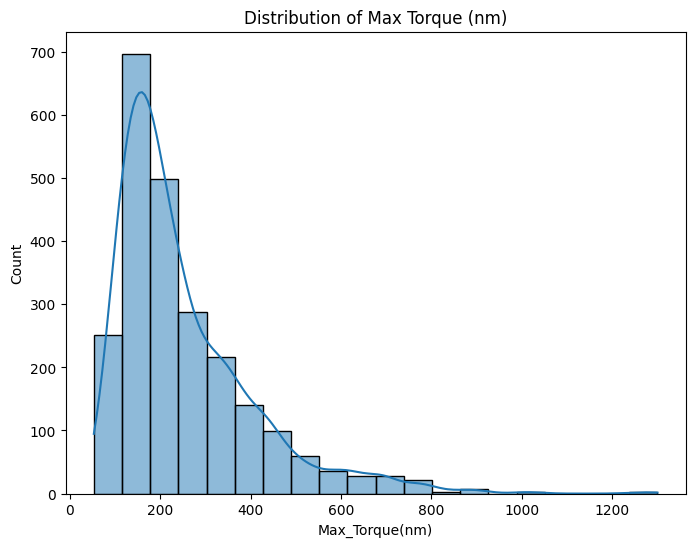

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Max_Torque(nm)'], bins=20, kde=True)
plt.title('Distribution of Max Torque (nm)')
plt.show()

<pre>Outlier Detection based on IQR</pre>

In [14]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [15]:
Max_Torque_nm_outliers = detect_outliers(df["Max_Torque(nm)"])
Max_Torque_nm_outliers = df[Max_Torque_nm_outliers].shape[0]
Max_Torque_nm_outliers

118

<pre>Out of 2378 instances in our dataframe it is not possible to have 118 outliers.</pre>

<pre>
Cylinders:

Let's check the distribution of the number of cylinders.
Plotting a bar chart to visualize the frequency of different cylinder counts.
</pre>

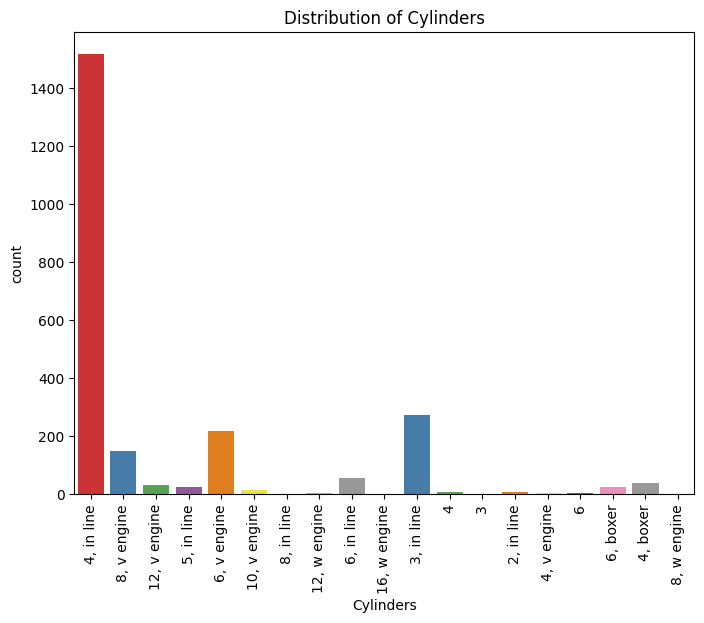

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cylinders', data=df, palette="Set1")
plt.title('Distribution of Cylinders')
plt.xticks(rotation=90)
plt.show()

<pre>
Valves_Per_Cylinder:

Let's explore the distribution of valves per cylinder.
Using a histplot to visualize the spread
</pre>

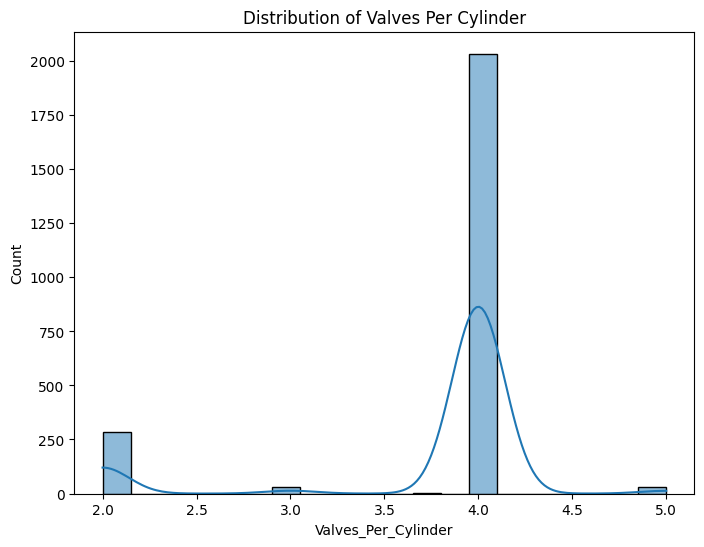

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Valves_Per_Cylinder'], bins=20, kde=True)
plt.title('Distribution of Valves Per Cylinder')
plt.show()

<pre>
Engine_Capacity(cc):

Let's examine the distribution of engine capacities.
Using a histogram to visualize the spread.
</pre>

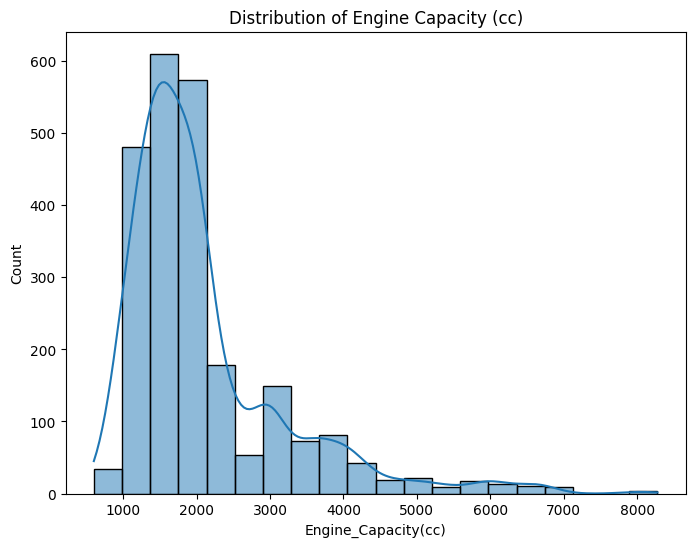

In [18]:
# 7. Engine_Capacity(cc)
plt.figure(figsize=(8, 6))
sns.histplot(df['Engine_Capacity(cc)'], bins=20, kde=True)
plt.title('Distribution of Engine Capacity (cc)')
plt.show()

<pre>Outlier Detection based on IQR</pre>


In [19]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [20]:
Engine_Capacity_cc_outliers = detect_outliers(df["Engine_Capacity(cc)"])
Engine_Capacity_cc_outliers = df[Engine_Capacity_cc_outliers].shape[0]
Engine_Capacity_cc_outliers

196

<pre>Out of 2378 instances in our dataframe it is not possible to have 196 outliers.</pre>

<pre>
Max_Power_Rpm:

Let's check the distribution of maximum power RPM values.
Using a histogram to visualize the spread.
</pre>

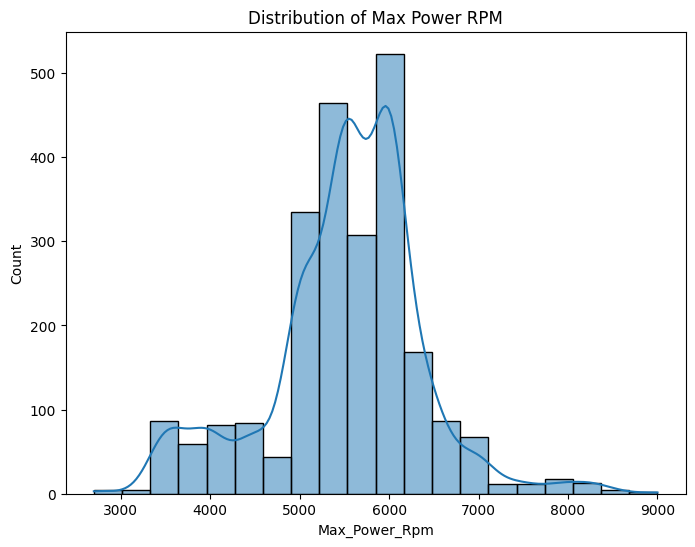

In [21]:
# 8. Max_Power_Rpm
plt.figure(figsize=(8, 6))
sns.histplot(df['Max_Power_Rpm'], bins=20, kde=True)
plt.title('Distribution of Max Power RPM')
plt.show()

<pre>Outlier Detection based on IQR</pre>

In [22]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [23]:
Max_Power_Rpm_outliers = detect_outliers(df["Max_Power_Rpm"])
Max_Power_Rpm_outliers = df[Max_Power_Rpm_outliers].shape[0]
Max_Power_Rpm_outliers

61

<pre>Out of 2378 instances in our dataframe it is not possible to have 61 outliers.</pre>

<pre>
Max_Torque_Rpm:

Let's explore the distribution of maximum torque RPM values.
Using a histogram to visualize the spread.
</pre>

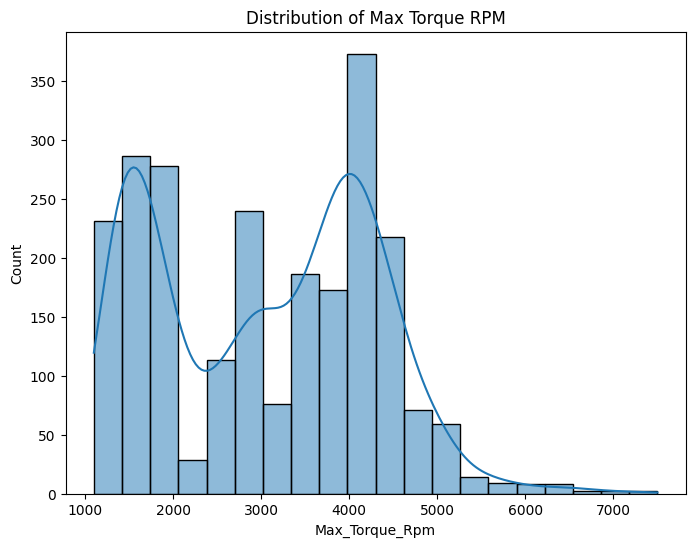

In [24]:
# 9. Max_Torque_Rpm
plt.figure(figsize=(8, 6))
sns.histplot(df['Max_Torque_Rpm'], bins=20, kde=True)
plt.title('Distribution of Max Torque RPM')
plt.show()

<pre>Outlier Detection based on IQR</pre>


In [25]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [26]:
Max_Torque_Rpm_outliers = detect_outliers(df["Max_Torque_Rpm"])
Max_Torque_Rpm_outliers = df[Max_Torque_Rpm_outliers].shape[0]
Max_Torque_Rpm_outliers

1

In [27]:
Max_Torque_Rpm_outliers = detect_outliers(df["Max_Torque_Rpm"])
df[Max_Torque_Rpm_outliers]

,Fuel_Type,Power(kw),Max_Torque(nm),Cylinders,Valves_Per_Cylinder,Engine_Capacity(cc),Max_Power_Rpm,Max_Torque_Rpm,Fuel_System,Turbo,Co2_Emissions(g/km),Compression_Ratio
488,gasoline,177.0,208.0,"4, in line",4.0,1997.0,8300.0,7500.0,multipoint injection,no,237.0,11.0


<pre>This is an Outlier.</pre>

In [28]:
df = df.drop(index=488, axis = 0)

In [29]:
Max_Torque_Rpm_outliers = detect_outliers(df["Max_Torque_Rpm"])
df[Max_Torque_Rpm_outliers]

,Fuel_Type,Power(kw),Max_Torque(nm),Cylinders,Valves_Per_Cylinder,Engine_Capacity(cc),Max_Power_Rpm,Max_Torque_Rpm,Fuel_System,Turbo,Co2_Emissions(g/km),Compression_Ratio


<pre>
Fuel_System:

Let's check the distribution of different fuel systems.
Plotting a bar chart to visualize the distribution.
</pre>

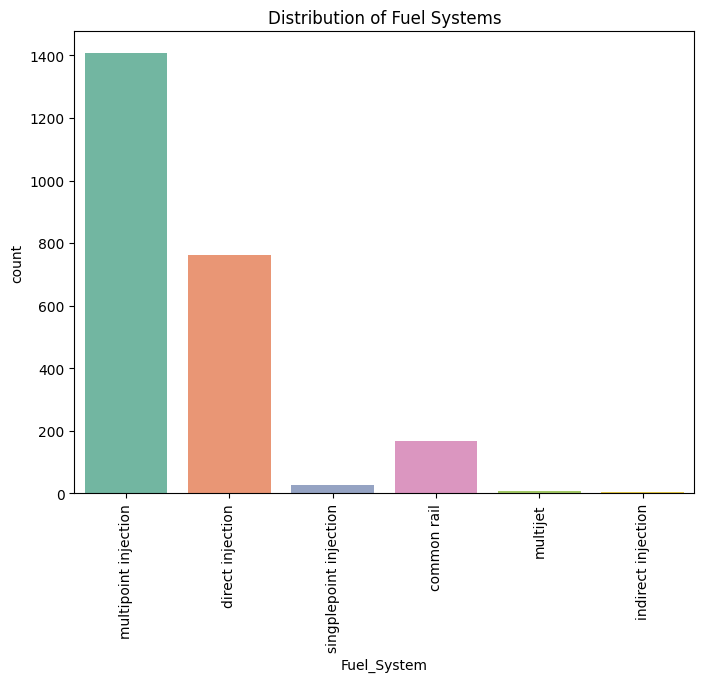

In [30]:
# 10. Fuel_System
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_System', data=df, palette="Set2")
plt.title('Distribution of Fuel Systems')
plt.xticks(rotation=90)
plt.show()

<pre>
Turbo:

Exploring the distribution of turbo.
Using a bar chart or count plot to visualize the frequency.
</pre>

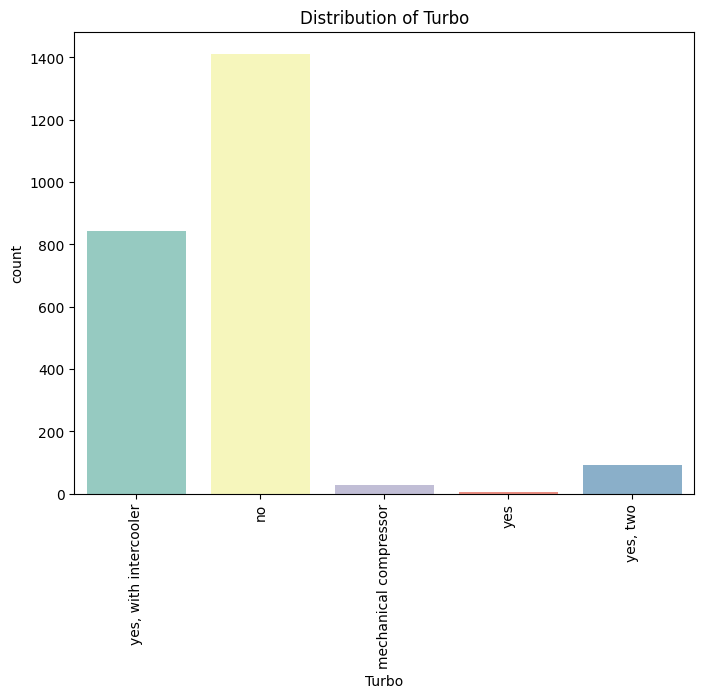

In [31]:
# 11. Turbo
plt.figure(figsize=(8, 6))
sns.countplot(x='Turbo', data=df, palette="Set3")
plt.title('Distribution of Turbo')
plt.xticks(rotation=90)
plt.show()

<pre>
CO2_Emissions(g/km):

Examining the distribution of CO2 emissions.
Using a histogram plot to visualize the spread.
</pre>

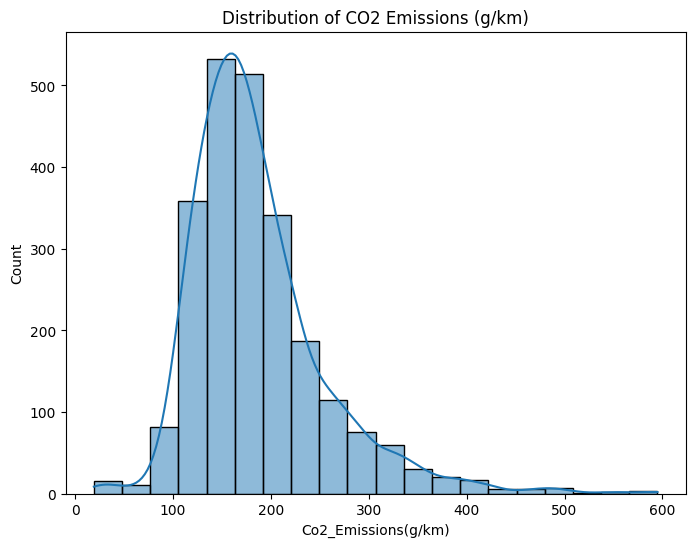

In [32]:
# 12. CO2_Emissions(g/km)
plt.figure(figsize=(8, 6))
sns.histplot(df['Co2_Emissions(g/km)'], bins=20, kde=True)
plt.title('Distribution of CO2 Emissions (g/km)')
plt.show()

<pre>Outlier Detection based on IQR</pre>

In [33]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = (data < lower_bound) | (data > upper_bound)
    
    return outliers

In [34]:
Co2_Emissions_outliers = detect_outliers(df["Co2_Emissions(g/km)"])
Co2_Emissions_outliers = df[Co2_Emissions_outliers].shape[0]
Co2_Emissions_outliers

119

<pre>Out of 2377 instances in our dataframe it is not possible to have 119 outliers.</pre>

<h3>Bivariate Analysis</h3>

<pre>
Pair plot for Power(kw), Max_Torque(nm), Engine_Capacity(cc)
</pre>

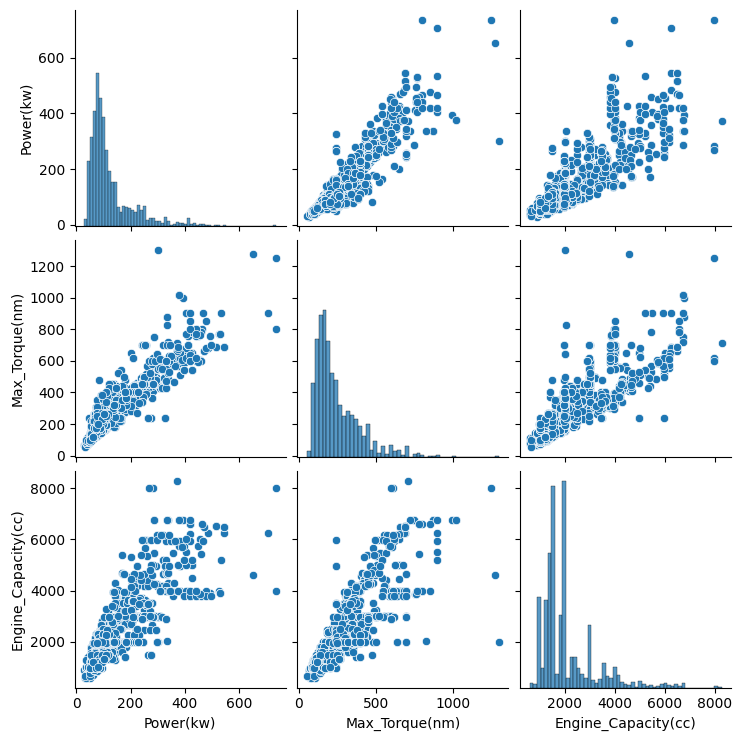

In [35]:
sns.pairplot(df[['Power(kw)', 'Max_Torque(nm)', 'Engine_Capacity(cc)']])
plt.show()

<pre>
Correlation matrix for  Power(kw), Max_Torque(nm), Engine_Capacity(cc), Co2_Emissions(g/km)
</pre>

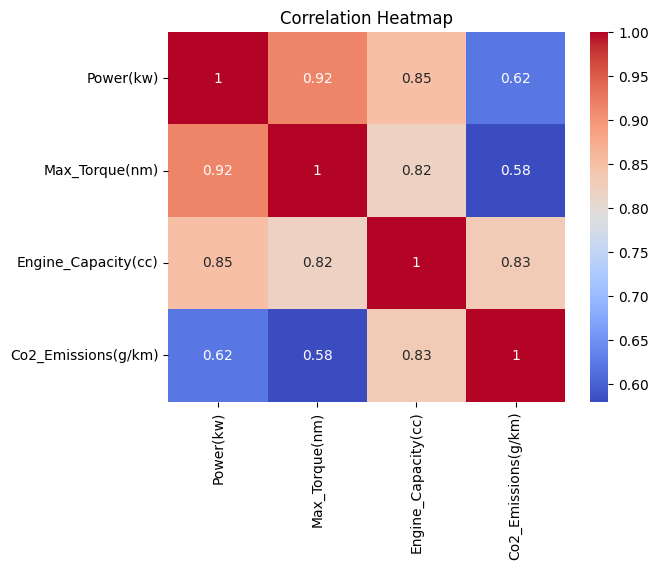

In [36]:
correlation_matrix = df[['Power(kw)', 'Max_Torque(nm)', 'Engine_Capacity(cc)', 'Co2_Emissions(g/km)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<pre>
Correlation matrix for all the features
</pre>

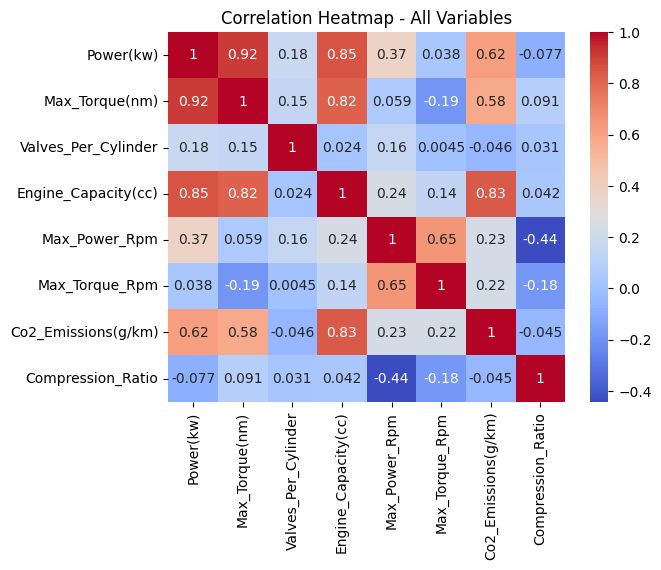

In [37]:
correlation_matrix_all = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - All Variables')
plt.show()

<pre> Fuel_Type vs. Co2_Emissions </pre>

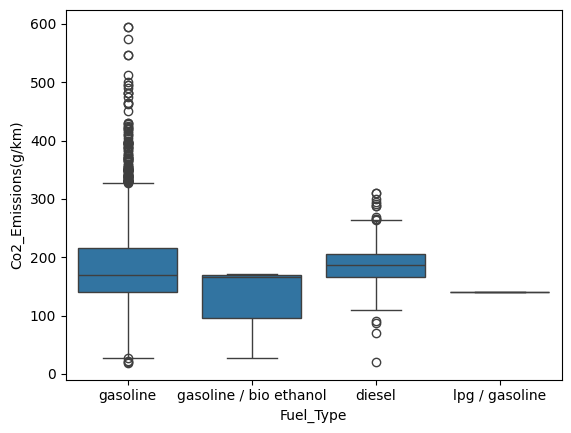

In [38]:
sns.boxplot(x='Fuel_Type', y='Co2_Emissions(g/km)', data=df)
plt.show()

<pre>Power vs. Max_Torque</pre>

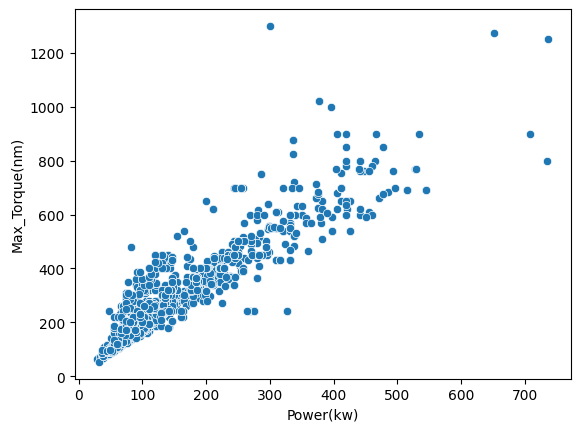

In [40]:
sns.scatterplot(x='Power(kw)', y='Max_Torque(nm)', data=df)
plt.show()

<pre>Cylinders vs. Engine_Capacity</pre>

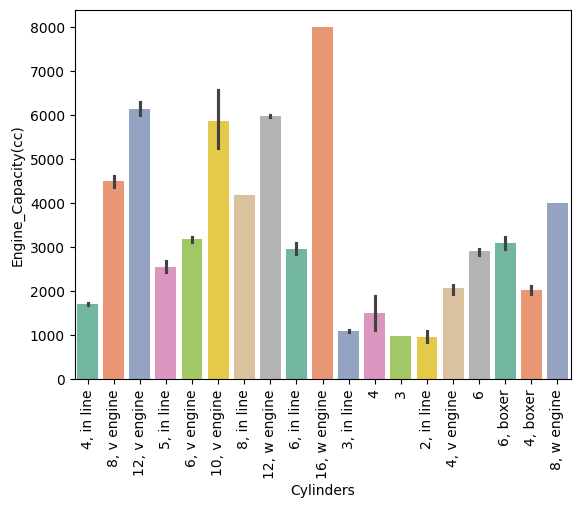

In [41]:
sns.barplot(x='Cylinders', y='Engine_Capacity(cc)', data=df, palette= "Set2")
plt.xticks(rotation = 90)
plt.show()

<pre>Turbo vs. Co2_Emissions</pre>

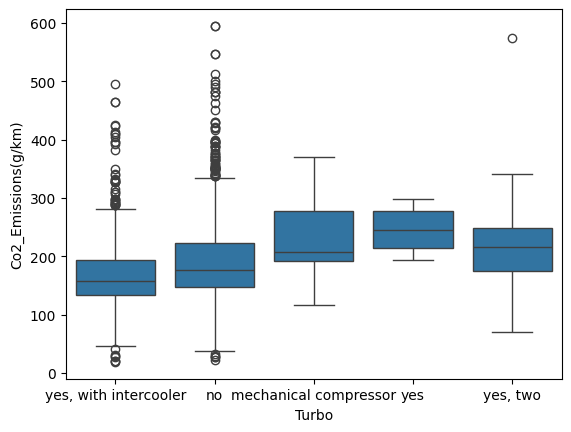

In [42]:
sns.boxplot(x='Turbo', y='Co2_Emissions(g/km)', data=df)
plt.show()

<pre>Engine_Capacity vs. Co2_Emissions</pre>

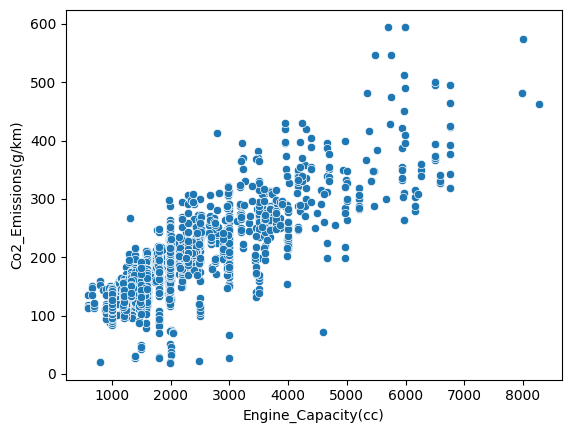

In [43]:
sns.scatterplot(x='Engine_Capacity(cc)', y='Co2_Emissions(g/km)', data=df)
plt.show()

<pre>Fuel_System vs. Max_Power_Rpm</pre>

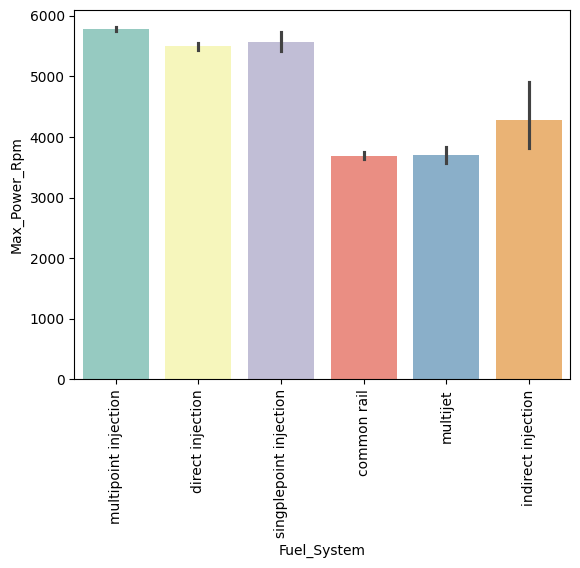

In [44]:
sns.barplot(x='Fuel_System', y='Max_Power_Rpm', data=df, palette="Set3")
plt.xticks(rotation = 90)
plt.show()

<pre>Cylinders vs. Co2_Emissions</pre>

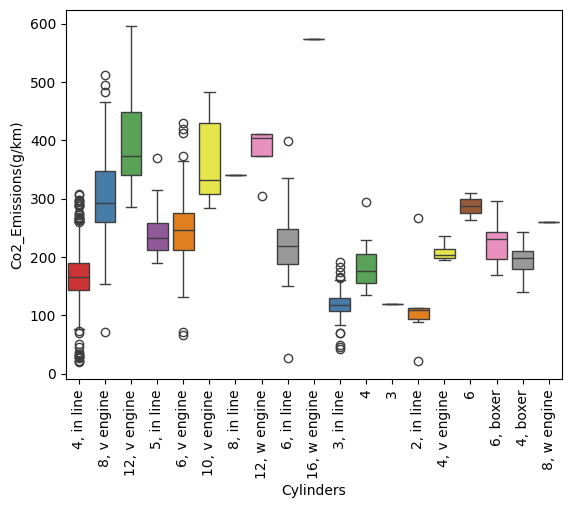

In [45]:
sns.boxplot(x='Cylinders', y='Co2_Emissions(g/km)', data=df, palette="Set1")
plt.xticks(rotation = 90)
plt.show()

<pre>Max_Torque vs. Max_Torque_Rpm</pre>

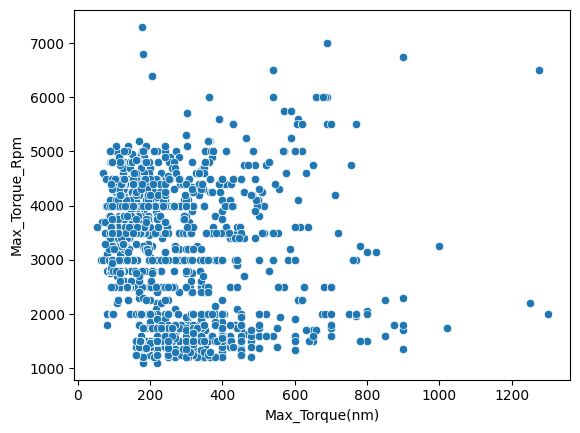

In [46]:
sns.scatterplot(x='Max_Torque(nm)', y='Max_Torque_Rpm', data=df)
plt.show()

<pre> Power vs. Engine_Capacity</pre>

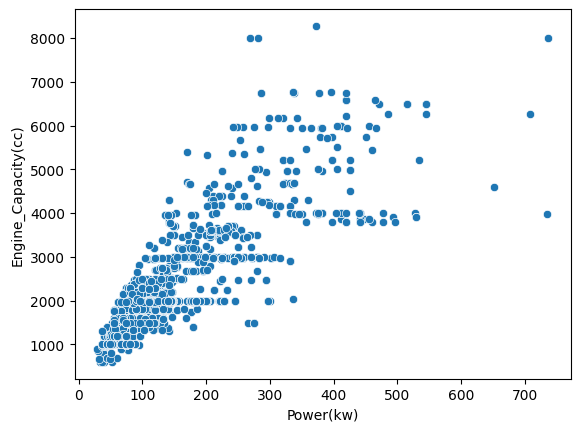

In [46]:
sns.scatterplot(x='Power(kw)', y='Engine_Capacity(cc)', data=df)
plt.show()

<pre>Fuel_Type vs. Co2_Emissions</pre>

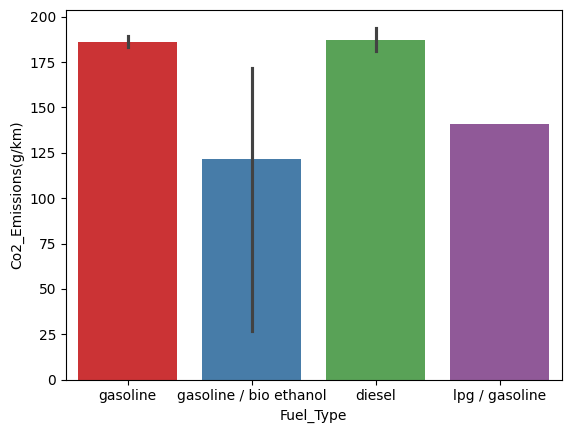

In [47]:
sns.barplot(x='Fuel_Type', y='Co2_Emissions(g/km)', data=df, palette="Set1")
plt.show()

<pre>Max_Torque vs. Co2_Emissions</pre>

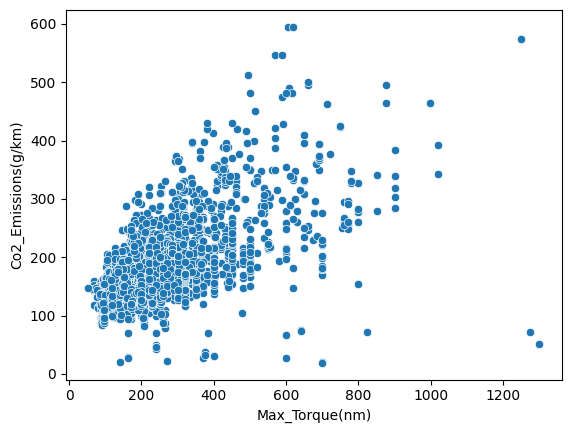

In [48]:
sns.scatterplot(x='Max_Torque(nm)', y='Co2_Emissions(g/km)', data=df)
plt.show()

<h3>Save Data</h3>

In [49]:
df.to_csv("../Data/Outlier_Cleaned_Data.csv")

### Upload Data to Cloud Storage

In [50]:
# update the 'my_path' variable to match the location of where you downloaded the data on your
# local filesystem

my_path = "../Data/Outlier_Cleaned_Data.csv"
# set the version number of the data asset
version = "Outlier_Cleaned_Data"

my_data = Data(
    name="Car-Data",
    version=version,
    description="Co2 Emissions Prediction - Car Data",
    path=my_path,
    type=AssetTypes.URI_FILE,
)

## create data asset if it doesn't already exist:
ml_client.data.create_or_update(my_data)
print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")

Uploading Outlier_Cleaned_Data.csv (< 1 MB): 100%|██████████| 247k/247k [00:00<00:00, 12.9MB/s]




Data asset created. Name: Car-Data, version: Outlier_Cleaned_Data
